In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoMinorLocator

In [2]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\Desktop\NPS Crash Data"
os.chdir(myworkingdirectory)

In [3]:
analysis_2023 = pd.read_csv("./analysis_database_2023.csv")

In [4]:
analysis_2023.shape

(207505, 57)

In [5]:
analysis_2023.head()

,INCID_NO,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,45_mph,...,Adverse Weather,LATITUDE,LONGITUDE,Park,RGN,YEAR,MONTH,DOW,HOUR,database
0,ABLI070425075000,0,0,0,0,0,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2007.0,4.0,3.0,7.0,CDS
1,ABLI070804175500,1,0,0,0,0,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2007.0,8.0,6.0,17.0,CDS
2,ABLI091117170900,0,0,0,0,1,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2009.0,11.0,2.0,17.0,CDS
3,ABLI121009110000,0,0,0,0,1,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2012.0,10.0,2.0,11.0,CDS
4,ABLI140610163500,0,0,0,0,0,0,0,0,0,...,0.0,38.91205,-76.93412,ABLI,SER,2014.0,6.0,2.0,16.0,CDS


In [6]:
analysis_2023.columns

Index(['INCID_NO', '5_mph', '10_mph', '15_mph', '20_mph', '25_mph', '30_mph',
       '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph', '65_mph',
       '70_mph', '75_mph', 'no_posted_speed', 'NUM_VEH', 'Num_Motorcycle',
       'Motorcycle_Ind', 'No Injury', 'Possible Injury',
       'Non-incapacitating Injury', 'Incapacitating Injury', 'Fatality',
       'Num_Motorist', 'Num_Non_Motorist', 'Num_Pedestrian', 'Num_Ped_Deaths',
       'Pedestrian', 'VRU', 'Crash_Severity', 'CrashSeverity_Fatal',
       'CrashSeverity_Incap', 'CrashSeverity_NonIncap',
       'CrashSeverity_Possible', 'CrashSeverity_NoInj', 'First_Harmful_Event',
       'First_Harmful_Event_Type', 'Involving Animal', 'Daylight', 'Dawn',
       'Dusk', 'Dark_Lit', 'Dark_NotLit', 'Dark_UnknownLit', 'Poor Lighting',
       'Adverse Weather', 'LATITUDE', 'LONGITUDE', 'Park', 'RGN', 'YEAR',
       'MONTH', 'DOW', 'HOUR', 'database'],
      dtype='object')

In [7]:
test = analysis_2023[['HOUR','MONTH','Fatality']] # X, Y, Z dimensions of surface plot
test.head()

,HOUR,MONTH,Fatality
0,7.0,4.0,0.0
1,17.0,8.0,0.0
2,17.0,11.0,0.0
3,11.0,10.0,0.0
4,16.0,6.0,0.0


In [8]:
# aggregate all fatalities at same month and hour
test_agg = test.groupby(['MONTH','HOUR']).sum().reset_index()
test_agg.head()

,MONTH,HOUR,Fatality
0,1.0,0.0,0.0
1,1.0,1.0,6.0
2,1.0,2.0,8.0
3,1.0,3.0,2.0
4,1.0,4.0,1.0


In [9]:
# check to make sure this makes sense by looking at only one month
test_Jan = test.loc[test['MONTH']==1.0]
test_Jan.head()

,HOUR,MONTH,Fatality
7,8.0,1.0,0.0
63,8.0,1.0,0.0
119,13.0,1.0,0.0
179,13.0,1.0,0.0
266,0.0,1.0,0.0


In [10]:
Jan_agg = test_Jan.groupby(['HOUR']).sum().reset_index()
Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with test_agg!!

,HOUR,MONTH,Fatality
0,0.0,243.0,0.0
1,1.0,226.0,6.0
2,2.0,195.0,8.0
3,3.0,191.0,2.0
4,4.0,128.0,1.0


In [11]:
test_agg.to_csv("./test_agg.csv",index=False)
test_agg.Fatality.max()

18.0

In [12]:
# transform the old column name in something numeric
test_agg['HOUR']=pd.Categorical(test_agg['HOUR'])
test_agg['HOUR']=test_agg['HOUR'].cat.codes

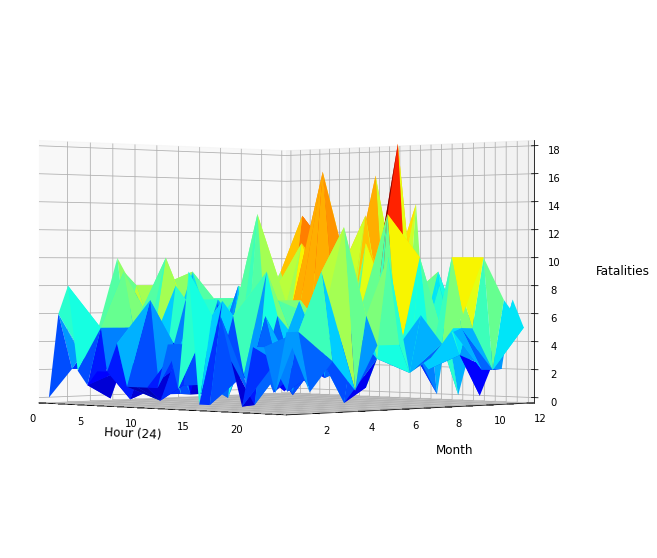

In [13]:
# 3D heatmap, based on this example: https://python-graph-gallery.com/371-surface-plot/
fig = plt.figure(figsize = (30, 10))
ax = fig.gca(projection ='3d')
surf = ax.plot_trisurf(test_agg['HOUR'], test_agg['MONTH'], test_agg['Fatality'], cmap = plt.cm.jet, linewidth = 0.2) # note: jet = color palette, vmax = maximum colormap value
ax.set_xlabel("Hour (24)", fontsize = 12)
ax.set_ylabel("Month", fontsize = 12, labelpad = 20) # note: 'labelpad' distances text label from tick value labels
ax.set_zlabel("Fatalities", fontsize = 12, labelpad = 30)
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlim(0, 23)
ax.set_ylim(1, 12)
ax.grid(which ='major', linewsidth = 1.2)
ax.grid(which ='minor', linewidth = 0.6)
ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) # limit y axis minor ticks to 1 between major ticks
#cb = fig.colorbar(surf, shrink = 0.70, aspect = 8)
#cb.ax.set_title('Fatalities', size = 13)
#cb.ax.tick_params(labelsize = 11)
#ax.view_init(90, 0) # rotate plot for top down view (shows that color is likely rate of change, not # fatalities, thus colorbar code was commented out as the value it represents is confusing)
#ax.view_init(0,-90) # rotate plot for straight on view (best perspective at Z axis with X and Y oriented per FHWA EDC-7 plots) - can confirm fatality values are plotted as expected 
ax.view_init(0,-45) # rotate plot for straight on perspective of Z axis without sacrificing Y axis - this method is likely not the best for visualizing our data
plt.show()

In [14]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query fatality values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight = test_agg['Fatality'].loc[test_agg['HOUR']==0.0]
one = test_agg['Fatality'].loc[test_agg['HOUR']==1.0]
two = test_agg['Fatality'].loc[test_agg['HOUR']==2.0]
three = test_agg['Fatality'].loc[test_agg['HOUR']==3.0]
four = test_agg['Fatality'].loc[test_agg['HOUR']==4.0]
five = test_agg['Fatality'].loc[test_agg['HOUR']==5.0]
six = test_agg['Fatality'].loc[test_agg['HOUR']==6.0]
seven = test_agg['Fatality'].loc[test_agg['HOUR']==7.0]
eight = test_agg['Fatality'].loc[test_agg['HOUR']==8.0]
nine = test_agg['Fatality'].loc[test_agg['HOUR']==9.0]
ten = test_agg['Fatality'].loc[test_agg['HOUR']==10.0]
eleven = test_agg['Fatality'].loc[test_agg['HOUR']==11.0]
twelve = test_agg['Fatality'].loc[test_agg['HOUR']==12.0]
thirteen = test_agg['Fatality'].loc[test_agg['HOUR']==13.0]
fourteen = test_agg['Fatality'].loc[test_agg['HOUR']==14.0]
fifteen = test_agg['Fatality'].loc[test_agg['HOUR']==15.0]
sixteen = test_agg['Fatality'].loc[test_agg['HOUR']==16.0]
seventeen = test_agg['Fatality'].loc[test_agg['HOUR']==17.0]
eighteen = test_agg['Fatality'].loc[test_agg['HOUR']==18.0]
nineteen = test_agg['Fatality'].loc[test_agg['HOUR']==19.0]
twenty = test_agg['Fatality'].loc[test_agg['HOUR']==20.0]
twentyone = test_agg['Fatality'].loc[test_agg['HOUR']==21.0]
twentytwo = test_agg['Fatality'].loc[test_agg['HOUR']==22.0]
twentythree = test_agg['Fatality'].loc[test_agg['HOUR']==23.0]

# combine columns into wide array
test_array = pd.DataFrame(np.column_stack([midnight,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twentyone,twentytwo,twentythree]), columns=['midnight','one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen','sixteen','seventeen','eighteen','nineteen','twenty','twentyone','twentytwo','twentythree'])
test_array.head()

,midnight,one,two,three,four,five,six,seven,eight,nine,...,fourteen,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twentyone,twentytwo,twentythree
0,0.0,6.0,8.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,...,9.0,0.0,0.0,6.0,3.0,0.0,4.0,4.0,1.0,5.0
1,2.0,3.0,2.0,5.0,0.0,2.0,0.0,2.0,7.0,0.0,...,6.0,7.0,6.0,2.0,0.0,6.0,3.0,1.0,5.0,1.0
2,4.0,2.0,2.0,9.0,5.0,3.0,4.0,1.0,4.0,1.0,...,2.0,2.0,5.0,9.0,6.0,3.0,7.0,2.0,9.0,3.0
3,10.0,4.0,8.0,6.0,3.0,10.0,8.0,7.0,2.0,1.0,...,13.0,3.0,7.0,5.0,4.0,1.0,3.0,5.0,12.0,1.0
4,7.0,0.0,7.0,8.0,2.0,6.0,3.0,2.0,7.0,0.0,...,5.0,6.0,7.0,6.0,5.0,9.0,0.0,5.0,6.0,4.0


In [15]:
# prep to set index
test_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
test_array.head()

,midnight,one,two,three,four,five,six,seven,eight,nine,...,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twentyone,twentytwo,twentythree,month
0,0.0,6.0,8.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,...,0.0,0.0,6.0,3.0,0.0,4.0,4.0,1.0,5.0,Jan
1,2.0,3.0,2.0,5.0,0.0,2.0,0.0,2.0,7.0,0.0,...,7.0,6.0,2.0,0.0,6.0,3.0,1.0,5.0,1.0,Feb
2,4.0,2.0,2.0,9.0,5.0,3.0,4.0,1.0,4.0,1.0,...,2.0,5.0,9.0,6.0,3.0,7.0,2.0,9.0,3.0,Mar
3,10.0,4.0,8.0,6.0,3.0,10.0,8.0,7.0,2.0,1.0,...,3.0,7.0,5.0,4.0,1.0,3.0,5.0,12.0,1.0,Apr
4,7.0,0.0,7.0,8.0,2.0,6.0,3.0,2.0,7.0,0.0,...,6.0,7.0,6.0,5.0,9.0,0.0,5.0,6.0,4.0,May


In [16]:
# set index
test_array = test_array.set_index('month')
test_array.head()

,midnight,one,two,three,four,five,six,seven,eight,nine,...,fourteen,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twentyone,twentytwo,twentythree
month,,,,,,,,,,,,,,,,,,,,,
Jan,0.0,6.0,8.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,...,9.0,0.0,0.0,6.0,3.0,0.0,4.0,4.0,1.0,5.0
Feb,2.0,3.0,2.0,5.0,0.0,2.0,0.0,2.0,7.0,0.0,...,6.0,7.0,6.0,2.0,0.0,6.0,3.0,1.0,5.0,1.0
Mar,4.0,2.0,2.0,9.0,5.0,3.0,4.0,1.0,4.0,1.0,...,2.0,2.0,5.0,9.0,6.0,3.0,7.0,2.0,9.0,3.0
Apr,10.0,4.0,8.0,6.0,3.0,10.0,8.0,7.0,2.0,1.0,...,13.0,3.0,7.0,5.0,4.0,1.0,3.0,5.0,12.0,1.0
May,7.0,0.0,7.0,8.0,2.0,6.0,3.0,2.0,7.0,0.0,...,5.0,6.0,7.0,6.0,5.0,9.0,0.0,5.0,6.0,4.0


In [17]:
test_array.to_csv("./test_array.csv",index=True)

In [18]:
# reverse row index so months match order in FHWA EDC-7 plots
test_array_reorder = np.flipud(test_array)
reordered_array = pd.DataFrame(test_array_reorder)
reordered_array.to_csv('./test_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Total Servicewide Fatalities by Month and Hour')

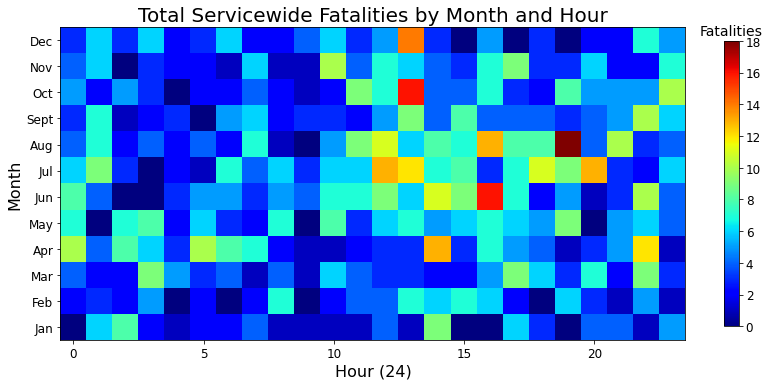

In [19]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(test_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('Fatalities', fontsize = 14)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Total Servicewide Fatalities by Month and Hour", size = 20)

In [20]:
poor_vis_OR = analysis_2023.loc[(analysis_2023['Poor Lighting'] == 1) | (analysis_2023['Adverse Weather'] == 1)]
poor_vis_OR.shape[0] # number of crashes with darkness OR bad weather

68188

In [21]:
poor_vis_OR.to_csv("./Poor Visibility OR.csv", index=False)

In [22]:
poor_vis_AND = analysis_2023.loc[(analysis_2023['Poor Lighting'] == 1) & (analysis_2023['Adverse Weather'] == 1)]
poor_vis_AND.shape[0] # number of crashes with darkness AND bad weather

7707

In [23]:
poor_vis_AND.to_csv("./Poor Visibility AND.csv", index=False)

In [24]:
involve_outcome_and_vis_cols_OR = poor_vis_OR[['Involving Animal','Num_Motorcycle','Motorcycle_Ind','Pedestrian','VRU',
                                              'Fatality','Num_Ped_Deaths',
       'Daylight','Dawn','Dusk','Dark_Lit','Dark_NotLit','Dark_UnknownLit','Poor Lighting','Adverse Weather']]
involve_outcome_and_vis_cols_OR.sum()

Involving Animal     7482.0
Num_Motorcycle       1194.0
Motorcycle_Ind       1146.0
Pedestrian            237.0
VRU                   380.0
Fatality              453.0
Num_Ped_Deaths         23.0
Daylight            12818.0
Dawn                 1822.0
Dusk                 2902.0
Dark_Lit             5848.0
Dark_NotLit         14979.0
Dark_UnknownLit        89.0
Poor Lighting       25640.0
Adverse Weather     50255.0
dtype: float64

In [25]:
involve_outcome_and_vis_cols_AND = poor_vis_AND[['Involving Animal','Num_Motorcycle','Motorcycle_Ind','Pedestrian','VRU',
                                              'Fatality','Num_Ped_Deaths',
       'Daylight','Dawn','Dusk','Dark_Lit','Dark_NotLit','Dark_UnknownLit','Poor Lighting','Adverse Weather']]
involve_outcome_and_vis_cols_AND.sum()

Involving Animal     730.0
Num_Motorcycle        56.0
Motorcycle_Ind        54.0
Pedestrian            27.0
VRU                   42.0
Fatality              65.0
Num_Ped_Deaths         6.0
Daylight               0.0
Dawn                 660.0
Dusk                 824.0
Dark_Lit            1719.0
Dark_NotLit         4477.0
Dark_UnknownLit       27.0
Poor Lighting       7707.0
Adverse Weather     7707.0
dtype: float64

In [26]:
pd.options.display.max_rows = 10000000
poor_vis_OR['First_Harmful_Event'].value_counts()

21. Motor vehicle in transport                                           29495
52. Tree/shrub                                                            8048
36. Other wild animal (crocodile, birds, coyote, etc.)                    5518
16. Other non-collision                                                   4515
47. Guardrail/cable face                                                  3123
66. Other fixed object                                                    2349
25. Other non-fixed object                                                2161
50. Wall                                                                  2147
22. Parked motor vehicle                                                  1509
45. Ditch                                                                 1261
53. Utility pole/light support                                             981
46. Earth embankment/berm                                                  974
54. Traffic sign support                            

In [27]:
poor_vis_AND['First_Harmful_Event'].value_counts()

21. Motor vehicle in transport                                           3029
52. Tree/shrub                                                           1171
36. Other wild animal (crocodile, birds, coyote, etc.)                    483
16. Other non-collision                                                   434
47. Guardrail/cable face                                                  401
50. Wall                                                                  305
25. Other non-fixed object                                                282
66. Other fixed object                                                    256
45. Ditch                                                                 149
53. Utility pole/light support                                            144
46. Earth embankment/berm                                                 116
54. Traffic sign support                                                  112
22. Parked motor vehicle                                        

In [28]:
#'Dawn','Dusk','Dark_Lit','Dark_NotLit','Dark_UnknownLit','Poor Lighting','Adverse Weather'
# should I keep generating first harmful event counts for all of the above poor vis attributes?
# do you want sum of invovlement and outcomes for each of above attributes?
poor_vis_OR['First_Harmful_Event'].loc[poor_vis_OR['Dawn']==1].value_counts()

21. Motor vehicle in transport                            670
36. Other wild animal (crocodile, birds, coyote, etc.)    326
52. Tree/shrub                                            213
16. Other non-collision                                    75
28. Deer                                                   57
50. Wall                                                   57
47. Guardrail/cable face                                   55
66. Other fixed object                                     48
25. Other non-fixed object                                 43
22. Parked motor vehicle                                   36
54. Traffic sign support                                   30
99. Unknown                                                24
46. Earth embankment/berm                                  23
45. Ditch                                                  20
60. Rock, boulder, rock slide                              20
07. Ran off the road right                                 17
0       